Метод опорных векторов

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, roc_curve, roc_auc_score
from sklearn.datasets import fetch_20newsgroups

%matplotlib inline

In [2]:
data = fetch_20newsgroups()
data.target_names

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [5]:
categories = ["comp.sys.mac.hardware", "rec.sport.baseball", "sci.space", "talk.religion.misc"]
data_train = fetch_20newsgroups(subset="train", remove=("headers", "footers", "quotes"), categories=categories)

vectorizer = TfidfVectorizer(stop_words="english")
vectors_train = vectorizer.fit_transform(data_train.data)

In [6]:
cv = KFold(n_splits=10)
params = {"kernel": ["linear"], "C": np.power(10.0, np.arange(-5, 6))}
gscv = GridSearchCV(SVC(), params, scoring="accuracy", cv=cv)
gscv.fit(vectors_train, data_train.target)
gscv.best_params_

{'C': 1.0, 'kernel': 'linear'}

In [7]:
data_test = fetch_20newsgroups(subset="test", remove=("headers", "footers", "quotes"), categories=categories)
vectors_test = vectorizer.transform(data_test.data)

svc_best = gscv.best_estimator_
y_pred = svc_best.predict(vectors_test)

In [8]:
all_idx = np.argsort(np.absolute(svc_best.coef_.toarray()))
idx = np.array(all_idx[0,-10:])
print(np.array(vectorizer.get_feature_names())[idx].tolist())

['scsi', 'monitor', 'mouse', 'team', 'problem', 'se', 'drive', 'apple', 'baseball', 'mac']


Логистическая регрессия

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [10]:
titles = ["variance of images", "skewness of images", "curtosis of images", "entropy of images", "class"]  
data = pd.read_csv('data_banknote_authentication.txt', names=titles)
data["class"] = data["class"].astype("category")
data.sample(10)

,variance of images,skewness of images,curtosis of images,entropy of images,class
425,1.74200,-4.8090,8.214200,-2.065900,0
237,3.89050,-2.1521,2.630200,1.104700,0
543,-1.42170,11.6542,-0.057699,-7.102500,0
1295,-4.94470,3.3005,1.063000,-1.444000,1
665,1.83730,6.1292,0.840270,0.552570,0
1213,-2.62000,-6.8555,6.216900,-0.622850,1
801,-0.91318,-2.0113,-0.195650,0.066365,1
921,-2.88330,1.7713,0.689460,-0.463800,1
751,2.25460,8.0992,-0.248770,-3.269800,0
262,1.81140,7.6067,-0.978800,-2.466800,0


In [11]:
data.isna().sum()

variance of images    0
skewness of images    0
curtosis of images    0
entropy of images     0
class                 0
dtype: int64

In [16]:
X = data.drop(columns=["class"])
y = data["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)
y_pred = LogisticRegression().fit(X_train, y_train).predict(X_test)

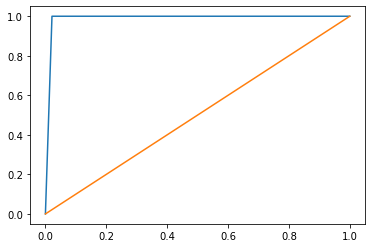

In [17]:
fpr, tpr, _ = roc_curve(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred)

plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1],'-')
plt.show()

In [18]:
auc

0.9892241379310345